In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential
import random

(x_tr,y_tr),(x_te,y_te)=mnist.load_data()
x_tr_drawing=x_tr
print("x_train",x_tr[0])
print("y_train",y_tr[0])
print("x_train",x_tr.shape)
print("y_train",y_tr.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0 

In [ ]:
image_size=784#28 X28
x_tr=x_tr.reshape(x_tr.shape[0],image_size)
x_te=x_te.reshape(x_te.shape[0],image_size)
print("x matrix after reshaping")
print("x train shape",x_tr.shape)
print("x test shape",x_te.shape)

num_classes=10
y_tr=keras.utils.to_categorical(y_tr,num_classes)
y_te=keras.utils.to_categorical(y_te,num_classes)

print("y after reshape")
print("y train shape",y_tr.shape)
print("y test shape",y_te.shape)


x matrix after reshaping
x train shape (60000, 784)
x test shape (10000, 784)
y after reshape
y train shape (60000, 10)
y test shape (10000, 10)


# Stochastic gradient decent

In [ ]:
model=Sequential()
model.add(Dense(units=2048,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1607680   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 3s 3ms/step - loss: 0.7974 - accuracy: 0.7802 - val_loss: 0.2500 - val_accuracy: 0.9375
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9283 - val_loss: 0.2014 - val_accuracy: 0.9483
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.9439 - val_loss: 0.1767 - val_accuracy: 0.9525
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1724 - accuracy: 0.9561 - val_loss: 0.1619 - val_accuracy: 0.9580
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1476 - accuracy: 0.9636 - val_loss: 0.1507 - val_accuracy: 0.9598
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1293 - accuracy: 0.9693 - val_loss: 0.1415 - val_accuracy: 0.9608
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9752 - val_loss: 0.1352 - val_accuracy: 0.9618

In [ ]:
loss,accuracy=model.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9656


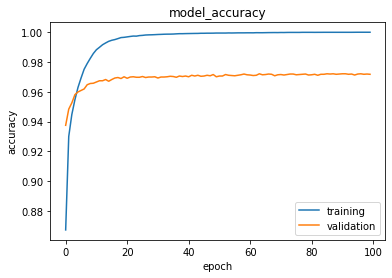

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

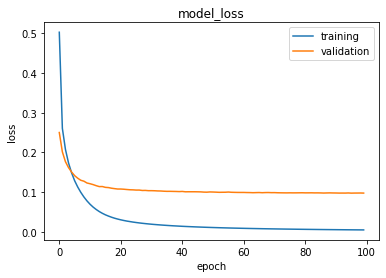

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
y_pred=model.predict(x_te)
Y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(y_te,1)
mat=confusion_matrix(Y_test,Y_pred)
print(mat)

[[ 971    0    0    1    1    1    4    1    1    0]
 [   0 1123    2    1    1    1    4    0    3    0]
 [   6    0  990    6    7    1    3    9    8    2]
 [   0    0    5  977    0    9    0    7    9    3]
 [   1    0    3    1  953    0    6    2    2   14]
 [   8    0    0   16    1  850    8    1    4    4]
 [   7    3    0    1    5    6  931    2    3    0]
 [   2    6   15    3    2    0    0  985    1   14]
 [   3    0    2   16    6    8    5    6  925    3]
 [   7    6    2    9   18    2    1    9    4  951]]


# RMSprop

In [ ]:
model1=Sequential()
model1.add(Dense(units=2048,activation='sigmoid',input_shape=(image_size,)))
model1.add(Dense(units=10,activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model1.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 0.5606 - accuracy: 0.8344 - val_loss: 0.1993 - val_accuracy: 0.9410
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1981 - accuracy: 0.9404 - val_loss: 0.1442 - val_accuracy: 0.9575
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.9519 - val_loss: 0.1220 - val_accuracy: 0.9645
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9577 - val_loss: 0.1309 - val_accuracy: 0.9633
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9632 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9640 - val_loss: 0.1224 - val_accuracy: 0.9645
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9666 - val_loss: 0.0986 - val_accuracy: 0.9722

In [ ]:
loss,accuracy=model1.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9714


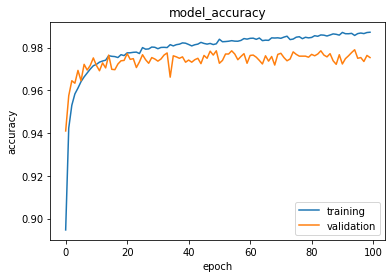

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

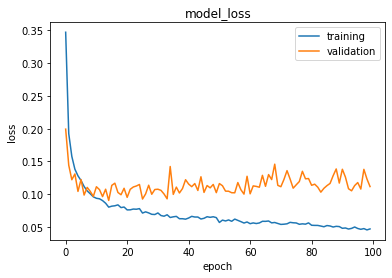

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
y_pred=model1.predict(x_te)
Y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(y_te,1)
mat=confusion_matrix(Y_test,Y_pred)
print(mat)

[[ 965    1    1    2    3    3    3    1    1    0]
 [   0 1121    2    3    0    2    2    2    3    0]
 [   4    0  971   13    7    5    3   15   13    1]
 [   0    0    1  984    0   10    1    5    4    5]
 [   1    1    0    0  969    0    5    0    0    6]
 [   3    0    0    7    1  874    5    0    1    1]
 [   4    2    1    1    2   14  932    0    2    0]
 [   0    1    3    4    3    2    0 1008    0    7]
 [   7    1    1    7    5   11    4    8  927    3]
 [   1    2    0    8   17    8    1    7    2  963]]


# Adam

In [ ]:
model2=Sequential()
model2.add(Dense(units=2048,activation='sigmoid',input_shape=(image_size,)))
model2.add(Dense(units=10,activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model2.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.4612 - accuracy: 0.8637 - val_loss: 0.2000 - val_accuracy: 0.9460
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.9340 - val_loss: 0.1656 - val_accuracy: 0.9565
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2060 - accuracy: 0.9415 - val_loss: 0.1593 - val_accuracy: 0.9563
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1904 - accuracy: 0.9440 - val_loss: 0.1651 - val_accuracy: 0.9532
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1811 - accuracy: 0.9476 - val_loss: 0.1437 - val_accuracy: 0.9608
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1729 - accuracy: 0.9493 - val_loss: 0.1445 - val_accuracy: 0.9612
Epoch 7/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9499 - val_loss: 0.1508 - val_accuracy: 0.9547

In [ ]:
loss,accuracy=model2.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9676


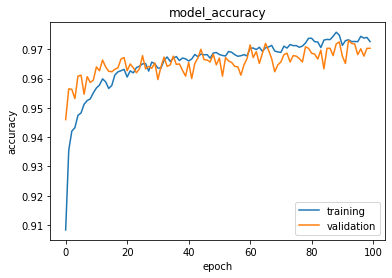

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

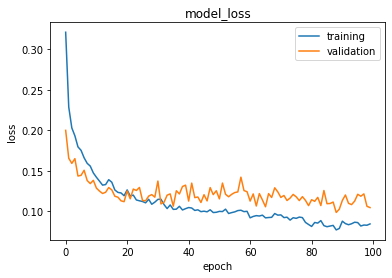

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
y_pred=model2.predict(x_te)
Y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(y_te,1)
mat=confusion_matrix(Y_test,Y_pred)
print(mat)

[[ 970    0    0    0    1    1    3    2    3    0]
 [   0 1114    2    1    0    1    4    3   10    0]
 [   7    1  992    4    4    0    5   10    9    0]
 [   2    0    9  957    0   12    1   10    9   10]
 [   1    0    4    0  945    0    7    2    3   20]
 [   4    0    0    8    2  863    9    1    4    1]
 [   6    1    1    0    3   10  934    0    2    1]
 [   1    1    6    4    1    0    0 1001    1   13]
 [   7    0    4    9    4    7    5    5  926    7]
 [   3    3    1    4   11    5    1    6    1  974]]


# Adagrad

In [ ]:
model3=Sequential()
model3.add(Dense(units=2048,activation='sigmoid',input_shape=(image_size,)))
model3.add(Dense(units=10,activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='Adagrad',loss='categorical_crossentropy',metrics=['accuracy'])
history=model3.fit(x_tr,y_tr,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 1s 3ms/step - loss: 1.1703 - accuracy: 0.6637 - val_loss: 0.4005 - val_accuracy: 0.9113
Epoch 2/100
422/422 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.8933 - val_loss: 0.3086 - val_accuracy: 0.9273
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.9165 - val_loss: 0.2701 - val_accuracy: 0.9338
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2972 - accuracy: 0.9235 - val_loss: 0.2497 - val_accuracy: 0.9398
Epoch 5/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9327 - val_loss: 0.2340 - val_accuracy: 0.9428
Epoch 6/100
422/422 [==============================] - 1s 3ms/step - loss: 0.2398 - accuracy: 0.9389 - val_loss: 0.2230 - val_accuracy: 0.9450
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9442 - val_loss: 0.2156 - val_accuracy: 0.9460

In [ ]:
loss,accuracy=model3.evaluate(x_te,y_te,verbose=True)


313/313 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9525


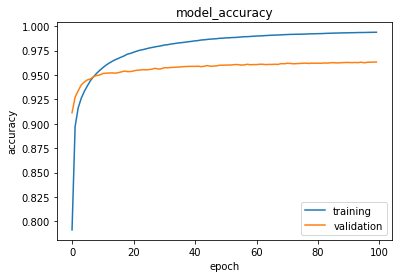

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

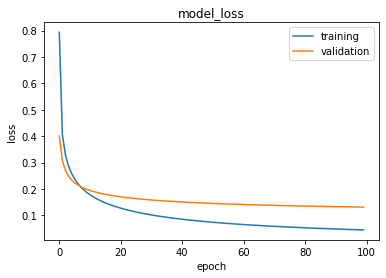

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()


In [ ]:
y_pred=model3.predict(x_te)
Y_pred=np.argmax(y_pred,1)
Y_test=np.argmax(y_te,1)
mat=confusion_matrix(Y_test,Y_pred)
print(mat)

[[ 967    0    1    2    0    2    5    1    2    0]
 [   0 1119    2    1    1    1    4    2    5    0]
 [   7    2  969    9    7    1    8   10   16    3]
 [   1    0   10  965    2    7    1    7   11    6]
 [   2    1    4    1  938    0    6    1    6   23]
 [   7    1    2   22    4  827   10    3   10    6]
 [  11    3    1    1    8    9  920    2    3    0]
 [   3    7   18    5    6    1    0  967    1   20]
 [   4    0    5   14    9    7    8    9  914    4]
 [   6    7    0   10   18    6    1   13    9  939]]
